In [1]:
import sympy as sp
import numpy as np

In [6]:
y = sp.symbols('y')
u = sp.Function('u')(y)
mu = sp.symbols('mu')
u0 = sp.symbols('u0')
h = sp.symbols('h')

In [12]:
eq = sp.Eq(u.diff(y,2),0)
bcs = {u.subs(y,0):0, u.subs(y,h):u0}

In [13]:
analytical_sol = sp.dsolve(eq, ics=bcs)
analytical_sol

Eq(u(y), u0*y/h)

In [19]:
velocity = analytical_sol.rhs
tau = mu*velocity.diff(y,1)

In [28]:
tau
#constant

mu*u0/h

In [21]:
stress_0 = tau.subs(y,0)
stress_h = tau.subs(y,h)

In [29]:
# vol flow rate = u*area => u*dy*w => u*dy

In [31]:
vol_flow_rate = sp.integrate(velocity, (y,0,h))
vol_flow_rate

h*u0/2

In [115]:
import matplotlib.pyplot as plt

def plot_flow(u,y):
    plt.plot(u,y)
    plt.ylabel("height")
    plt.xlabel("velocity")
    plt.show()
    
def velocity_value(expression, height):
    return expression.subs(y,height)

In [116]:
hs = np.linspace(0,10,40)

In [117]:
## plotting

In [118]:
def velocity_profile(u_=10, h_=5):
    ua = analytical_sol.subs(u0,u_).subs(h,h_)
    ub = [velocity_value(ua,height) for height in hs]
    
    us =  [ub[i].rhs for i in range(len(hs))]
    
    plot_flow(us,hs)

In [121]:
from ipywidgets import interactive

w = interactive(velocity_profile, (u_,1,10), (h_,1,10))
w

NameError: name 'u_' is not defined

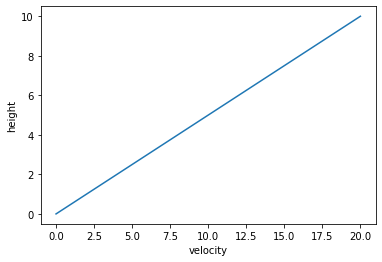

In [120]:
velocity_profile()